In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
import tensorflow as tf
#from tensorflow.contrib.data import Dataset, Iterator
#import sklearn.cross_validation as sk
import warnings; warnings.simplefilter('ignore')
import cv2
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import sys
import random

from sklearn.metrics import classification_report, confusion_matrix

from astropy.io import fits
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np


import time
from datetime import timedelta

ImportError: cannot import name 'LeakyRelu'

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
Data = pd.read_csv('sample/trainCatalogCombined.csv')


In [4]:
Data.head()

,class_Jorge,runID,ohdu,eventID,classID_Jorge,class_Diego,classID_Diego,class_Javier,classID_Javier
0,undefined,6378,5,233,3,undefined,3,undefined,3
1,muon_sure,6704,5,628,0,muon_sure,0,muon_sure,0
2,error de segmentacion,7228,2,163,4,error de segmentacion,4,error de segmentacion,4
3,error de segmentacion,6609,5,137,4,error de segmentacion,4,error de segmentacion,4
4,error de segmentacion,7279,5,168,4,error de segmentacion,4,error de segmentacion,4


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class_Jorge     2028 non-null   object
 1   runID           2028 non-null   int64 
 2   ohdu            2028 non-null   int64 
 3   eventID         2028 non-null   int64 
 4   classID_Jorge   2028 non-null   int64 
 5   class_Diego     2028 non-null   object
 6   classID_Diego   2028 non-null   int64 
 7   class_Javier    2028 non-null   object
 8   classID_Javier  2028 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 142.7+ KB


In [6]:
Data["muon"] = Data.classID_Jorge==0


In [7]:
def preprocessing(matrix):
    #************************
    #funcion que recibe una matriz imagen, y hace el preprocesamiento necesario, jutno con el resize y agregado de 0s
    #*************
    size=100
    #convertir a numpy array
    data = np.array(matrix)
    #quitar los valores negativos
    data = np.where(data<0, 0, data)
    #convertir a escala logaritmica
   # data = np.uint8(np.log1p(data))
    data = (np.sqrt(data))
    
    #normalizar a 0-255
    #data = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    
    #resize
    if data.shape[1] == data.shape[0]:
        result = cv2.resize(data,(size,size), interpolation = cv2.INTER_NEAREST)
        
    elif data.shape[0] > data.shape[1]:
        resized = cv2.resize(data,(int(data.shape[1]*size/data.shape[0]),size), interpolation = cv2.INTER_NEAREST)
        sumar = int((size - resized.shape[1])/2)
        if resized.shape[1]%2 == 0:
            result = np.pad(resized, ((0,0),(sumar,sumar)) , mode='constant', constant_values=(0,0))
        else:
            result = np.pad(resized, ((0,0),(sumar+1,sumar)) , mode='constant', constant_values=(0,0))
            
    elif data.shape[1]> data.shape[0]:
        resized = cv2.resize(data,(size,int(data.shape[0]*size/data.shape[1])), interpolation = cv2.INTER_NEAREST)
        sumar = int((size - resized.shape[0])/2)
        if resized.shape[0]%2 == 0:
            result = np.pad(resized, ((sumar,sumar),(0,0)) , mode='constant', constant_values=(0,0))
        else:
            result = np.pad(resized, ((sumar+1,sumar),(0,0)) , mode='constant', constant_values=(0,0))
    return result




In [8]:
Pwd='/tf/Documentos/CONNIEData/eventsFits/'
#crear los vectores x con las matrices ya procesadas (de 64x64) y el vector y con las etiquetas
data = []
labels = []
for row in Data.iterrows():
    fits_image_filename =Pwd+str(row[1].runID)+'/catalog' +str(row[1].runID)+ '_' +str(row[1].ohdu)+'_' + str(row[1].eventID) + '.fits'
    with fits.open(fits_image_filename,memmap=False) as hdul:
        scidata = hdul[0].data
        del hdul
    mat = preprocessing(scidata)
    data.append(mat)
    labels.append(row[1].muon)


print (len(data))
print (len(labels))
print ('muonSure:\t' + str( labels.count(True)))


2028
2028
muonSure:	364


In [9]:
 data=np.array(data)
    

True
False
False
False


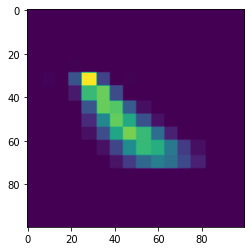

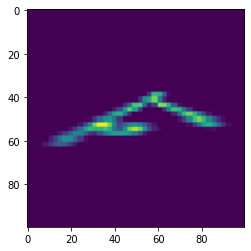

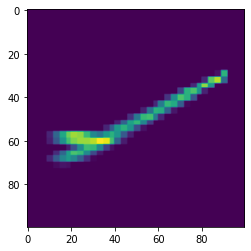

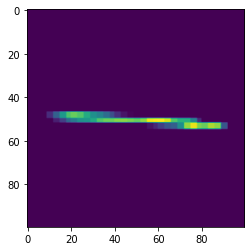

In [10]:
for i in [1,2,3,4]:
    I = np.asarray(data[i])
    fig = plt.figure()
    plt.imshow(I)
    print(labels[i])

In [11]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
	fill_mode="nearest")


[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
from sklearn.utils import class_weight

In [13]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.argmax(trainY, axis=1)),
                                                 np.argmax(trainY, axis=1))
d_class_weights = dict(enumerate(class_weights))

In [14]:
print(d_class_weights )

{0: 0.6093163035311796, 1: 2.7869415807560136}


In [15]:
trainX =np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)
trainX = np.concatenate( [trainX,trainX,trainX], axis=-1 )
testX = np.concatenate( [testX,testX,testX], axis=-1)


In [16]:
print(np.shape(trainX))

(1622, 100, 100, 3)


In [17]:
vgg_pretrained_model = VGG16(weights="imagenet", 
                             include_top= False,
                             input_tensor=Input(shape=(100, 100,3)))
new_model = vgg_pretrained_model.output
new_model = AveragePooling2D(pool_size=(3, 3))(new_model)
new_model = Flatten(name="flatten")(new_model)
new_model = Dense(256, activation="relu")(new_model)
new_model = Dropout(0.5)(new_model)
new_model = Dense(2, activation="softmax")(new_model)
model = Model(inputs=vgg_pretrained_model.input, outputs=new_model)
model_json = model.to_json()
with open("modelos/vgg16_80_20/model.json", "w") as json_file:
    json_file.write(model_json)


In [18]:
INIT_LR = 1e-6
EPOCHS = 100
BS = 200

In [19]:
filepath="modelos/vgg16_80_20/best_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"]),
    

[INFO] compiling model...


(None,)

In [21]:
print("[INFO] training head...")

start_time = time.monotonic()

H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),class_weight=d_class_weights ,
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    callbacks=callbacks_list,

    validation_steps=len(testX) // BS,epochs=EPOCHS)
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 2.9243 - accuracy: 0.5190
Epoch 00001: val_accuracy improved from -inf to 0.52217, saving model to modelos/vgg16_80_20/best_model.h5
8/8 [==============================] - 7s 825ms/step - loss: 2.9243 - accuracy: 0.5190 - val_loss: 1.2072 - val_accuracy: 0.5222
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 2.0562 - accuracy: 0.5647
Epoch 00002: val_accuracy improved from 0.52217 to 0.63793, saving model to modelos/vgg16_80_20/best_model.h5
8/8 [==============================] - 4s 453ms/step - loss: 2.0562 - accuracy: 0.5647 - val_loss: 0.7190 - val_accuracy: 0.6379
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.5684 - accuracy: 0.6526
Epoch 00003: val_accuracy improved from 0.63793 to 0.81527, saving model to modelos/vgg16_80_20/best_model.h5
8/8 [==============================]

Epoch 27/100
8/8 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9318
Epoch 00027: val_accuracy did not improve from 0.97044
8/8 [==============================] - 3s 316ms/step - loss: 0.2056 - accuracy: 0.9318 - val_loss: 0.1155 - val_accuracy: 0.9655
Epoch 28/100
8/8 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9248
Epoch 00028: val_accuracy did not improve from 0.97044
8/8 [==============================] - 2s 282ms/step - loss: 0.2262 - accuracy: 0.9248 - val_loss: 0.1109 - val_accuracy: 0.9680
Epoch 29/100
8/8 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.9255
Epoch 00029: val_accuracy did not improve from 0.97044
8/8 [==============================] - 3s 325ms/step - loss: 0.1954 - accuracy: 0.9255 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 30/100
8/8 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9332
Epoch 00030: val_accuracy did not improve from 0.97044
8/8 [============

Epoch 56/100
8/8 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9599
Epoch 00056: val_accuracy did not improve from 0.98276
8/8 [==============================] - 2s 284ms/step - loss: 0.1320 - accuracy: 0.9599 - val_loss: 0.0804 - val_accuracy: 0.9803
Epoch 57/100
8/8 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9599
Epoch 00057: val_accuracy did not improve from 0.98276
8/8 [==============================] - 2s 284ms/step - loss: 0.1056 - accuracy: 0.9599 - val_loss: 0.0801 - val_accuracy: 0.9803
Epoch 58/100
8/8 [==============================] - ETA: 0s - loss: 0.1187 - accuracy: 0.9613
Epoch 00058: val_accuracy did not improve from 0.98276
8/8 [==============================] - 3s 326ms/step - loss: 0.1187 - accuracy: 0.9613 - val_loss: 0.0787 - val_accuracy: 0.9803
Epoch 59/100
8/8 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9627
Epoch 00059: val_accuracy did not improve from 0.98276
8/8 [============

Epoch 86/100
8/8 [==============================] - ETA: 0s - loss: 0.0958 - accuracy: 0.9698
Epoch 00086: val_accuracy did not improve from 0.98276
8/8 [==============================] - 2s 284ms/step - loss: 0.0958 - accuracy: 0.9698 - val_loss: 0.0656 - val_accuracy: 0.9778
Epoch 87/100
8/8 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9754
Epoch 00087: val_accuracy did not improve from 0.98276
8/8 [==============================] - 2s 291ms/step - loss: 0.0719 - accuracy: 0.9754 - val_loss: 0.0669 - val_accuracy: 0.9778
Epoch 88/100
8/8 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9719
Epoch 00088: val_accuracy did not improve from 0.98276
8/8 [==============================] - 2s 283ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 0.0664 - val_accuracy: 0.9778
Epoch 89/100
8/8 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9691
Epoch 00089: val_accuracy did not improve from 0.98276
8/8 [============

In [22]:
model.save_weights("modelos/vgg16_80_20/model.h5")
print("Saved model to disk")
model = load_model(filepath)

Saved model to disk


In [23]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.92      0.99      0.95        73

    accuracy                           0.98       406
   macro avg       0.96      0.98      0.97       406
weighted avg       0.98      0.98      0.98       406



In [24]:


cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



[[327   6]
 [  1  72]]
acc: 0.9828
sensitivity: 0.9820
specificity: 0.9863


In [ ]:
N = EPOCHS
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
#plt.savefig(args["plot"])